# Credit Card Fraud Detection

Kaggle Dataset:
https://www.kaggle.com/mlg-ulb/creditcardfraud

This dataset presents credit card transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Due to confidentiality, the features were transformed using PCA issues. Features V1, V2, … V28 are the principal components obtained with PCA.

In [1]:
# Import the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

/opt/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/miniconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: P

In [2]:
# Import the dataset

data = pd.read_csv('creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Check if any missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The only features which have not been transformed with PCA are __Time__, __Amount__ and __Class__ (0: not fraud, 1: fraud)

In [5]:
data[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


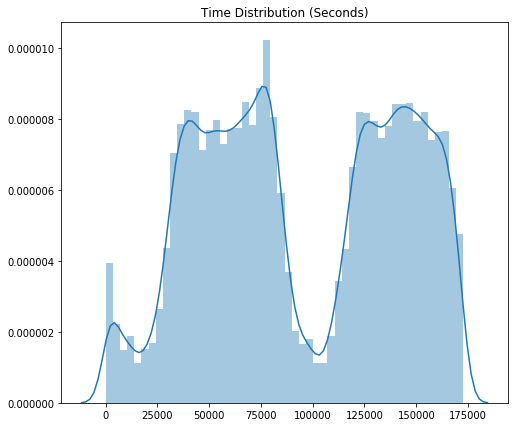

In [6]:
# Plot Time distribution of two days
plt.figure(figsize=(8, 7))
plt.title('Time Distribution (Seconds)')
sns.distplot(data[['Time']])

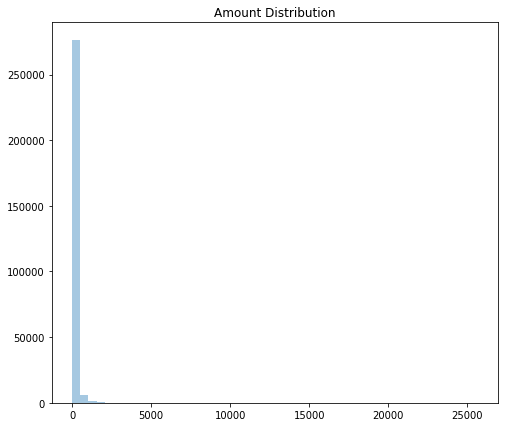

In [7]:
# Plot Amount Distribution
plt.figure(figsize=(8, 7))
plt.title('Amount Distribution')
sns.distplot(data[['Amount']], kde=False)

In [8]:
class_count = data['Class'].value_counts()
print(class_count)
fraud_count = class_count[1]
non_fraud_count = class_count[0]

0    284315
1       492
Name: Class, dtype: int64


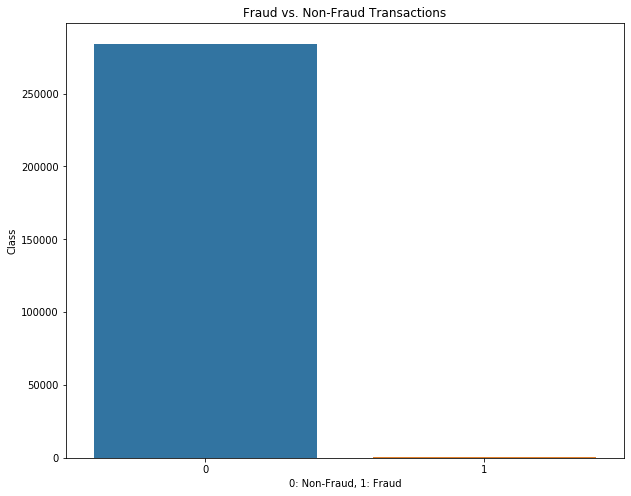

In [9]:
# Plot class Distribution
plt.figure(figsize=(10, 8))
plt.title('Fraud vs. Non-Fraud Transactions')
plt.xlabel('0: Non-Fraud, 1: Fraud')
plt.ylabel('Count')
sns.barplot(x=class_count.index, y=class_count)

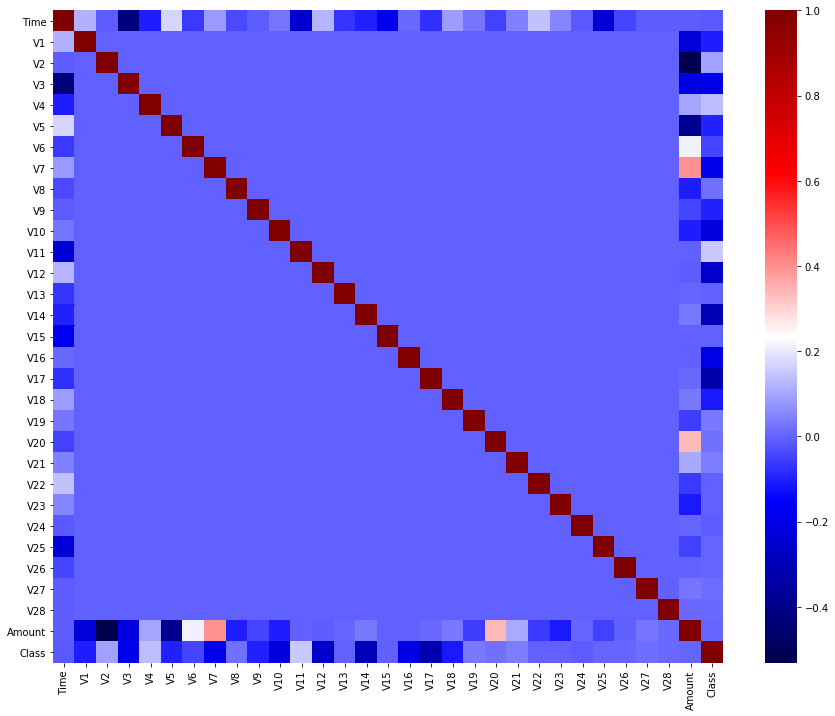

In [10]:
# Feature Correlation 
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=False, cmap="seismic")

Highest correlations come from:
    
- Time and V3 (-0.42)
- Amount and V2 (-0.53)  
- Amount and V4 (0.4)

While these correlations are high, I don't expect it to run the risk of multicollinearity.

# Scaling

StandardScaler: It transforms the data in such a manner that it has a mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data that has negative values. It arranges the data in a normal distribution. It is more useful in classification than regression.

Normalization is more useful in regression than classification as it squeesez the data from 0 to 1.

Using StandardScaler as this is a binary classification problem.

In [11]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [12]:
# Splitting the dataset in training, validation and testing sets (60-20-20)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=data['Class'], random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.2, stratify=y_temp, random_state=42)

In [13]:
# Initalize standard scaler
scaler = StandardScaler().fit(X_train)

# Scale data
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

To deal with imabalanced dataset, I will use Random Oversampling and Random Undersampling.

Check this out: 
https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/

In [14]:
X_train, y_train = RandomOverSampler(sampling_strategy=0.1, random_state=42).fit_resample(X_train, y_train)
X_valid, y_valid = RandomOverSampler(sampling_strategy=0.1, random_state=42).fit_resample(X_valid, y_valid)

X_train, y_train = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train)
X_valid, y_valid = RandomUnderSampler(random_state=42).fit_sample(X_valid, y_valid)

Given the class imbalance ratio, kaggle recommends measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.



Fitting the model to dataset. Most exciting part!

In [15]:
# Logistic Regression

penalty = ['l2']
C = np.logspace(0, 5, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic_regression = LogisticRegression(max_iter=10000, solver='lbfgs')
logistic_grid =GridSearchCV(logistic_regression, param_grid, cv=3, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 4.64158883e+01, 2.15443469e+03, 1.00000000e+05,
       4.64158883e+06, 2.15443469e+08, 1.00000000e+10, 4.64158883e+11,
       2.15443469e+13, 1.00000000e+15]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [16]:
logistic_grid.best_estimator_

LogisticRegression(C=100000.00000000006, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [17]:
kernel = ['linear', 'poly', 'rbf']
C = [1]
param_grid = dict(C=C, kernel=kernel)

svc = SVC()
svc_grid = GridSearchCV(svc, param_grid, cv=3, scoring='roc_auc', verbose=10, n_jobs=-1)
svc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   17.5s remaining:   34.9s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   19.1s remaining:   23.9s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   20.9s remaining:   16.7s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   24.4s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   25.9s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   27.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   27.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1], 'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=10)

In [18]:
naive_bayes = GaussianNB()
naive_bayes = naive_bayes.fit(X_train, y_train)

In [19]:
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [500]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [20]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
def roc_scores(X, y):
    model_list = [logistic_grid.best_estimator_, naive_bayes, rf_grid.best_estimator_]
    model_name = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
    
    fig, ax = plt.subplots(figsize=(10, 9))
    for i, model in enumerate(model_list):
        y_pred = model.predict_proba(X)[:, 1]
        fpr, tpr, threshold = roc_curve(y, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=(model_name[i] + ' AUC = %0.4f' % roc_auc), linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize = 15, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc = 'lower right', prop={'size': 15})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=20, fontname="Ubuntu")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate', FontSize=20, fontname="Ubuntu")
    plt.xlabel('False Positive Rate', FontSize=20, fontname="Ubuntu")
    plt.show()

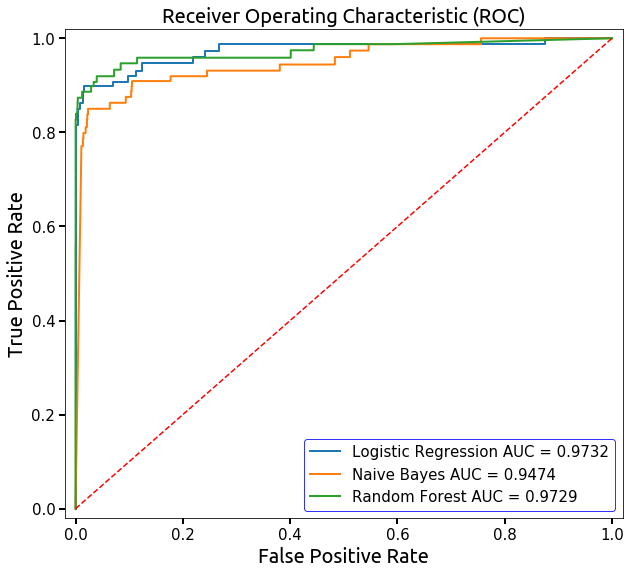

In [22]:
roc_scores(X_valid, y_valid)

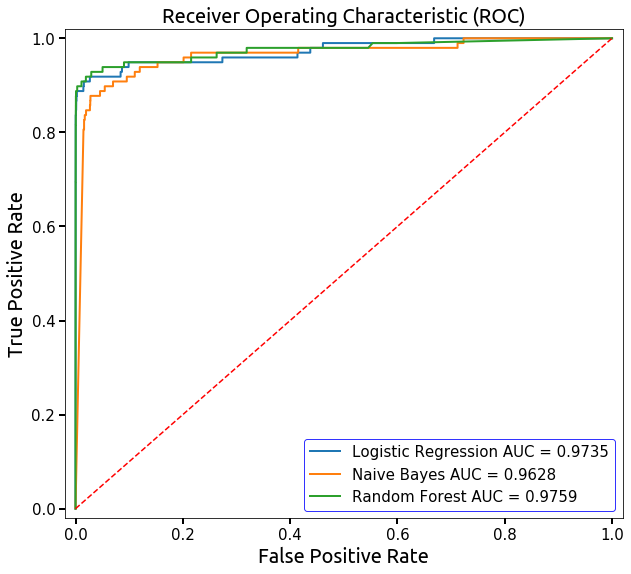

In [23]:
roc_scores(X_test, y_test)

In [24]:
def find_best_threshold(X, y, model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(X)[:, 1] >= threshold) 
        f1 = f1_score(y, y_predict)
        acc = accuracy_score(y, y_predict)
        rec = recall_score(y, y_predict)
        pre = precision_score(y, y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre = threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [25]:
models = [logistic_grid, naive_bayes, rf_grid]
model_names = ["Logistic Regression", "Naive Bayes", "Random Forest"]
chart = list()
for item,name in zip(models, model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(X_test, y_test, item, 20)
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

In [26]:
pd.DataFrame(chart, columns=['Model', 'Best Threshhold','F1 Score','Accuracy','Recall','Precision'])

,Model,Best Threshhold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.947368,0.462766,0.996454,0.887755,0.312950
1,Naive Bayes,1.000000,0.155533,0.985130,0.795918,0.086188
2,Random Forest,0.894737,0.797872,0.999333,0.765306,0.833333


In [27]:
def make_confusion_matrix_val(model, threshold=0.5):
    y_predict = (model.predict_proba(X_valid)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_valid, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = 'Ubuntu', fontsize = 20, pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

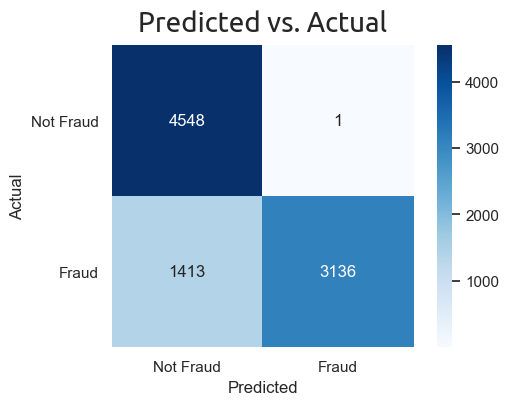

In [33]:
make_confusion_matrix_val(rf_grid, threshold=0.894)

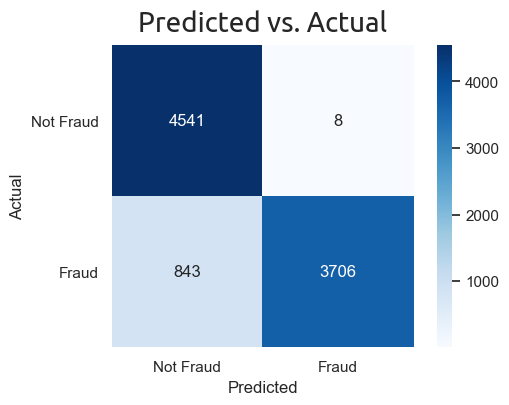

In [34]:
make_confusion_matrix_val(logistic_grid, threshold=0.9473)

In [30]:
def make_confusion_matrix_test(model, threshold=0.5):
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels=['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual',fontname = 'Ubuntu', fontsize = 20, pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

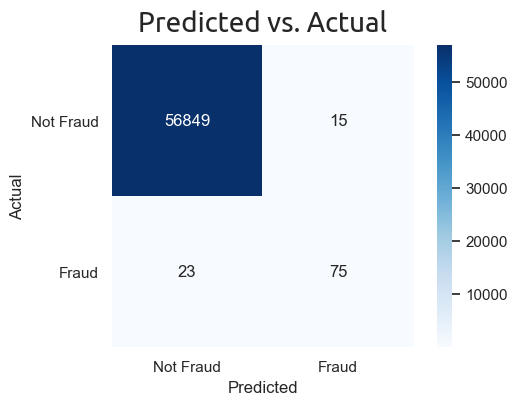

In [35]:
make_confusion_matrix_test(rf_grid, threshold=0.894)

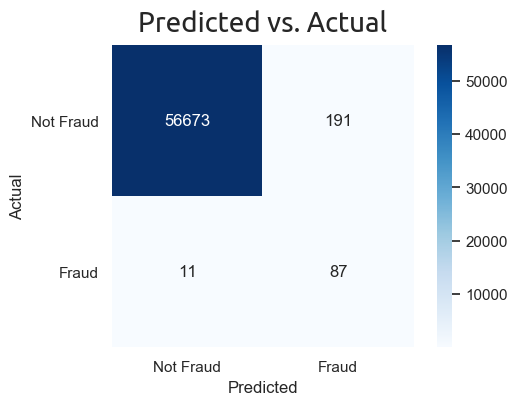

In [36]:
make_confusion_matrix_test(logistic_grid, threshold=0.9473)